# Adult Income Data Exploration

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import scipy as sp
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

## Preliminary Wrangling

This document explores a dataset containing 32560 observations on 1994 US Adult Census income.

In [86]:
# read the data
income = pd.read_csv("income_data.csv", sep=r'\s*,\s*', engine='python',na_values = '?')
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [87]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


__Empty values & unwanted columns__

In [88]:
income_clean = income.copy()

# Drop rows with empty values
income_clean = income.dropna()

In [89]:
# Since this is a Cencus dataset, we cannot drop duplicates.

In [90]:
# Drop unwanted columns 
# fnlwgt: This variable captures the known socio economic factor, however, it's hard to interpret
# eduaction: The same information could be captured in education-num
# relationship: It overlaps with information gained from marital status and sex

income_clean = income_clean.drop(['fnlwgt', 'education', 'relationship'], axis = 1)

__Check levels for different categorical data__

In [91]:
income_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 12 columns):
age               30162 non-null int64
workclass         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
income            30162 non-null object
dtypes: int64(5), object(7)
memory usage: 3.0+ MB


In [92]:
income_clean.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [93]:
income_clean.occupation.value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [94]:
income_clean.workclass.value_counts()
# The distribution of workclass seemed extremely unbalanced
# and can be merged into larger categories

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [95]:
# Combine related levels together
income_clean['workclass']=np.where(income_clean['workclass'] =='Self-emp-not-inc', 'Self_Employed', income_clean['workclass'])
income_clean['workclass']=np.where(income_clean['workclass'] =='Local-gov', 'Government', income_clean['workclass'])
income_clean['workclass']=np.where(income_clean['workclass'] =='State-gov', 'Government', income_clean['workclass'])
income_clean['workclass']=np.where(income_clean['workclass'] =='Self-emp-inc', 'Self_Employed', income_clean['workclass'])
income_clean['workclass']=np.where(income_clean['workclass'] =='Federal-gov', 'Government', income_clean['workclass'])
income_clean['workclass']=np.where(income_clean['workclass'] =='Without-pay', 'No_work', income_clean['workclass'])
income_clean['workclass']=np.where(income_clean['workclass'] =='Never-worked', 'No_work', income_clean['workclass'])

In [96]:
income_clean.workclass.value_counts()

Private          22286
Government        4289
Self_Employed     3573
No_work             14
Name: workclass, dtype: int64

In [97]:
income_clean['marital-status'].value_counts()
# Same as occupation, merge the levels of married

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital-status, dtype: int64

In [98]:
income_clean['marital-status']=np.where(income_clean['marital-status'] =='Married-civ-spouse', 'Married', income_clean['marital-status'])
income_clean['marital-status']=np.where(income_clean['marital-status'] =='Married-spouse-absent', 'Married', income_clean['marital-status'])
income_clean['marital-status']=np.where(income_clean['marital-status'] =='Married-AF-spouse', 'Married', income_clean['marital-status'])

In [99]:
income_clean['marital-status'].value_counts()

Married          14456
Never-married     9726
Divorced          4214
Separated          939
Widowed            827
Name: marital-status, dtype: int64

In [100]:
income_clean['native-country'].value_counts()
# The distribution of workclass seemed extremely unbalanced
# Since US take the majority and others are too few compared with US
# We can merge other countries into Non-US category

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador                     

In [101]:
income_clean['native-country']=np.where(income_clean['native-country'] !='United-States', 'Non-US', income_clean['native-country'])

In [102]:
income_clean['native-country'].value_counts()

United-States    27504
Non-US            2658
Name: native-country, dtype: int64

__Get capital diff from capital gain and loss__

In [103]:
income_clean['capital_change']= income_clean['capital-gain']-income_clean['capital-loss']
income_clean = income_clean.drop(['capital-gain','capital-loss'], axis=1)


__Clean Data__

In [124]:
income_clean.sample(5)

,age,workclass,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income,capital_change
24776,32,Private,9,Divorced,Adm-clerical,White,Male,40,United-States,<=50K,3887
28295,44,Private,9,Never-married,Machine-op-inspct,Asian-Pac-Islander,Female,45,Non-US,<=50K,0
23909,22,Private,7,Never-married,Other-service,White,Female,30,United-States,<=50K,0
8981,47,Private,14,Married,Exec-managerial,White,Male,65,United-States,>50K,0
18353,40,Private,10,Divorced,Other-service,White,Female,48,United-States,<=50K,0


In [105]:
income_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 11 columns):
age               30162 non-null int64
workclass         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
race              30162 non-null object
sex               30162 non-null object
hours-per-week    30162 non-null int64
native-country    30162 non-null object
income            30162 non-null object
Capital_Change    30162 non-null int64
dtypes: int64(4), object(7)
memory usage: 2.8+ MB


In [326]:
income_clean.to_csv('income_clean.csv')

## Univariate Exploration

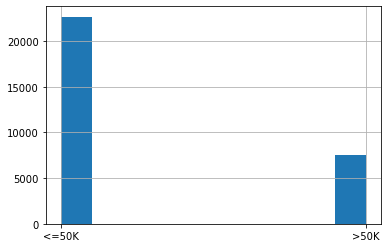

In [106]:
# start from distribution of income
income_clean['income'].hist()
# Most people in US at that time has less than <= 50k salary

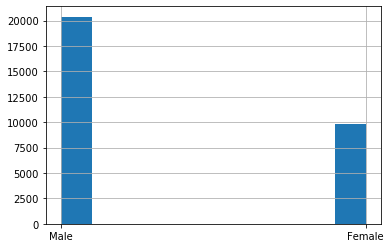

In [183]:
income_clean['sex'].hist()
# Interesting that only 10k female participated in this census while 20k male participated

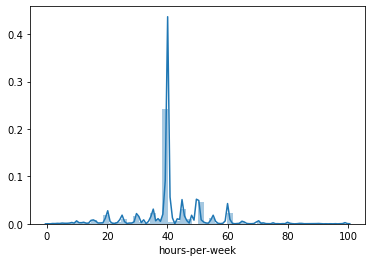

In [120]:
sns.distplot(income_clean['hours-per-week'])
# Majority centered around 40 hours a week

In [121]:
income_clean['hours-per-week'].value_counts()
# Most workers are working 40/50/45 hours a week

40    14251
50     2718
45     1753
60     1405
35     1184
      ...  
94        1
87        1
74        1
82        1
92        1
Name: hours-per-week, Length: 94, dtype: int64

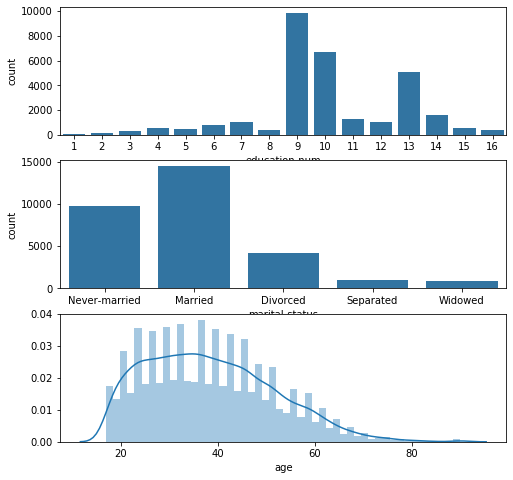

In [133]:
# let's plot all numerical values together 

fig, ax = plt.subplots(nrows=3, figsize = [8,8])

default_color = sns.color_palette()[0]
sns.countplot(data = income_clean, x = 'education-num', color = default_color, ax = ax[0])
sns.countplot(data = income_clean, x = 'marital-status', color = default_color, ax = ax[1])
sns.distplot(income_clean['age'], color = default_color, ax = ax[2])

plt.show()

In [154]:
print(set(income.loc[income['education-num'] == 9, 'education'].values))
print(set(income.loc[income['education-num'] == 10, 'education'].values))
print(set(income.loc[income['education-num'] == 13, 'education'].values))

{'HS-grad'}
{'Some-college'}
{'Bachelors'}


1. Most people have 9-10 or 13 years of education, corresponding to High School, Some-college and Bachelors.
2. Most people are marries, follow by never-married.
3. Majority of people's age are under the range of 20 to 50. Most are near 40.

## Bivariate Explorations

__Investigate the relationship directly between the income and another column__

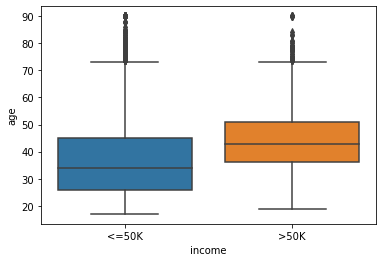

In [168]:
# Price and age
sns.boxplot(y="age", x="income", data=income_clean)
# People who have less than 50K salary have lower average age

No handles with labels found to put in legend.


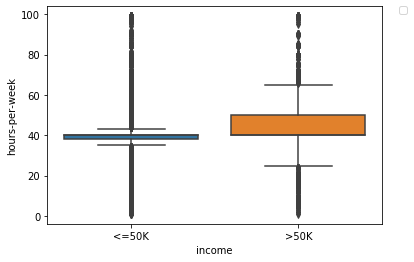

In [289]:
sns.boxplot(y="hours-per-week", x="income", data=income_clean)

# people who earn less than 50K salary are concentrated around 40 hours a week,
# while people who earn more have an average working hour greater than or equal to 40 hours a week.

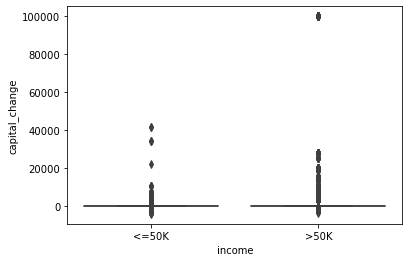

In [188]:
sns.boxplot(y="capital_change", x="income", data=income_clean)
# There's no significant difference between capital change for both groups of salary

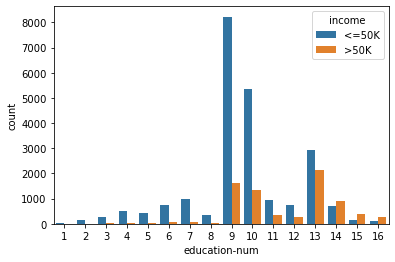

In [172]:
sns.countplot(x='education-num', hue='income', data = income_clean)
# Most of the <=50K people are from HS-graduate 
# Most > 50K people are from Bachelors or some college
# However, thinking of the age distribution of this dataset, it might because of these three education levels cover largest population
# So we need to look into the true percentage

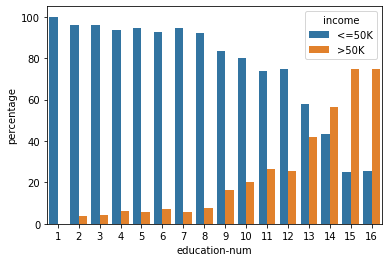

In [171]:
income_counts = (income_clean.groupby(['education-num'])['income']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('income'))
p = sns.barplot(x="education-num", y="percentage", hue="income", data=income_counts)

# From the barplot picturing proportion information, 
# we can see that longer education-num has larger proportion of people who earn more than 50K

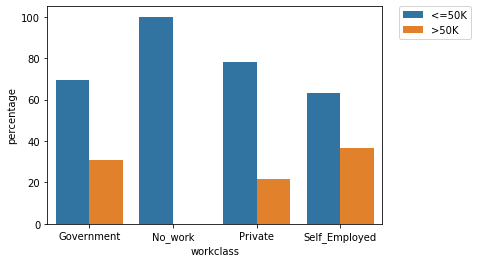

In [288]:
income_counts = (income_clean.groupby(['workclass'])['income']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('income'))
p = sns.barplot(x="workclass", y="percentage", hue="income", data=income_counts)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Self-employed people have the largest proportion of >50K salary
# followed by government then private

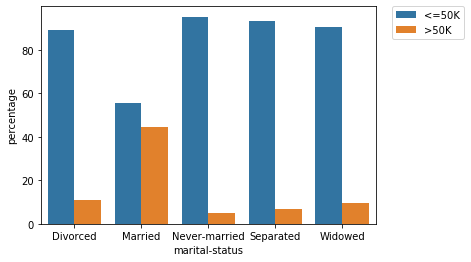

In [287]:
income_counts = (income_clean.groupby(['marital-status'])['income']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('income'))
p = sns.barplot(x="marital-status", y="percentage", hue="income", data=income_counts)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Married people have the largest proportion of >50K salary
# others' proportions are similar, but never-married people have lowest proportion of >50K salary people

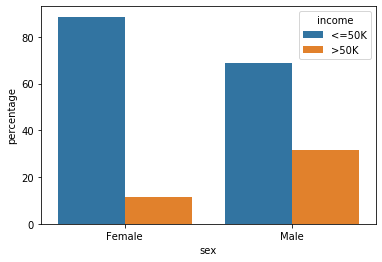

In [181]:
income_counts = (income_clean.groupby(['sex'])['income']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('income'))
p = sns.barplot(x="sex", y="percentage", hue="income", data=income_counts)

# Male have the largest proportion of >50K salary
# It would be interesting to look at interactions to find out whether there is significant gender discrimination

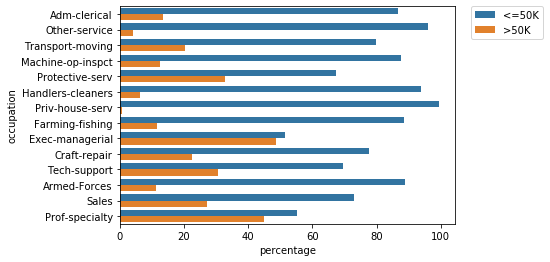

In [286]:
income_counts = (income_clean.groupby(['occupation'])['income']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('income'))
p = sns.barplot(y="occupation", x="percentage", hue="income", data=income_counts)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# People who work as executive managers, in protective service or have professional specialties tend to earn more.

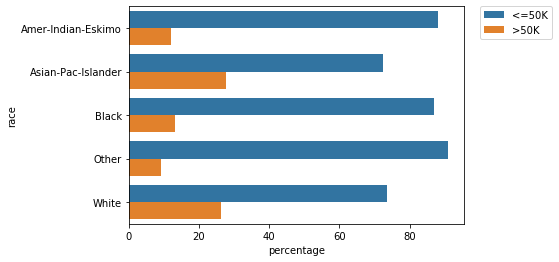

In [285]:
income_counts = (income_clean.groupby(['race'])['income']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('income'))
p = sns.barplot(y="race", x="percentage", hue="income", data=income_counts)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# White and Asian-Pac-Islander have similar high proportion of >= 50K (around 30%)
# Amer-Indian-Eskimo and Black have similar lower proportion of >=50K (around 15%)
# Other minorities have least proportion of >=50K
# We can explore on whether there're significant race discrimination by looking into interactions

__Conclusion of bivariate explorations__

Except for capital changes, all other features show significant relationship with the income.
Among those, the age and gender issues are the most interested features. In the following part of multivariate explorations, I would focus on these interactions featuring either characteristic.

## Multivariate Explorations

### gender

#### Check the Interaction between gender and age

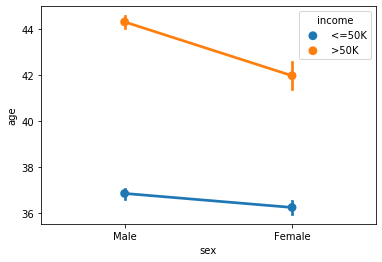

In [295]:
sns.pointplot(y="age", x="sex", hue = 'income', data=income_clean)

# The plot indicates that there might be discrimination in different genders' age

In [296]:
female_age = income_clean.loc[income_clean['sex'] == 'Female', 'age']
male_age = income_clean.loc[income_clean['sex'] == 'Male', 'age']
stat, pval = stats.f_oneway(female_age, male_age)
print('{0:0.3f}'.format(stat))
print('{0:0.3f}'.format(pval))
# The one-way anova test suggests that the difference is significant

204.132
0.000


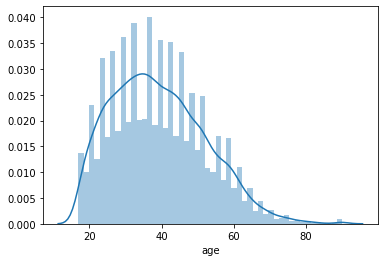

In [311]:
# However, this might due to the age distribution of adult in census
# So let's check their distribution
# For male
sns.distplot(income_clean.loc[income_clean['sex'] == 'Male', 'age'])

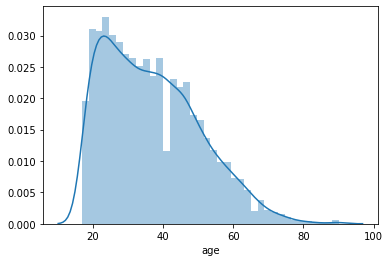

In [310]:
# For female
sns.distplot(income_clean.loc[income_clean['sex'] == 'Female', 'age'])

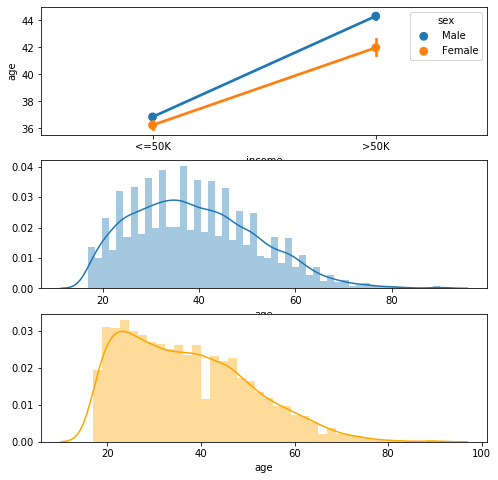

In [322]:
# Put all three together
fig, ax = plt.subplots(nrows=3, figsize = [8,8])

sns.pointplot(y="age", x="income", hue = 'sex', data=income_clean, ax = ax[0])
sns.distplot(income_clean.loc[income_clean['sex'] == 'Male', 'age'], ax = ax[1])
sns.distplot(income_clean.loc[income_clean['sex'] == 'Female', 'age'], color = 'orange', ax = ax[2])
plt.show()

# Generally the female has a lower average age compared to male
# It might because of genders' have different distribution 

#### Check the interaction between gender and education

In [294]:
income_clean.groupby(['sex', 'income'])['education-num'].agg('mean')

sex     income
Female  <=50K      9.878777
        >50K      11.812950
Male    <=50K      9.474328
        >50K      11.570513
Name: education-num, dtype: float64

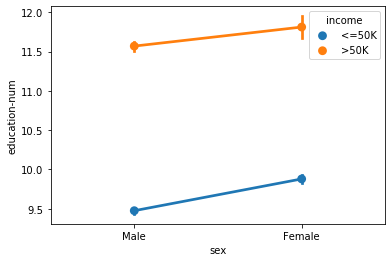

In [259]:
sns.pointplot(y="education-num", x="sex", hue = 'income', data=income_clean)

# The pointplot below shows that on average, female have higher education level in education
# It might mean that woman have to earn higher education degree to have more income

In [293]:
female_edu = income_clean.loc[income_clean['sex'] == 'Female', 'education-num']
male_edu = income_clean.loc[income_clean['sex'] == 'Male', 'education-num']
stat, pval = stats.f_oneway(female_edu, male_edu)
print('{0:0.3f}'.format(stat))
print('{0:0.3f}'.format(pval))
# However, from the one-way anova test, we see that the difference is not significant

1.143
0.285


#### Check the interaction between hours-per-week and gender

Text(0.5, 1, 'Interaction between education and sex')

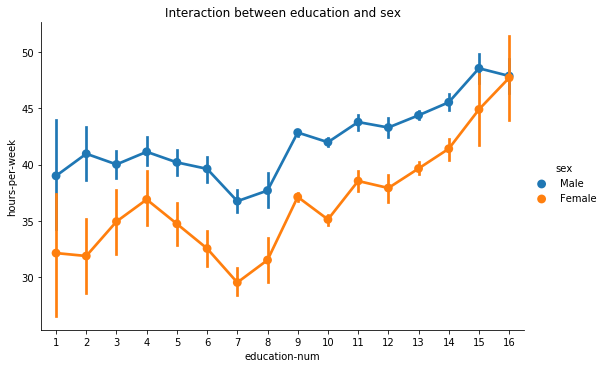

In [206]:
sns.catplot(x = 'education-num', y = 'hours-per-week', hue = 'sex', kind = 'point', data = income_clean, height=5, aspect=1.5)
plt.title('Interaction between education and sex')

# As the significant interaction plots shown below, for example, 
# Generally, females are discriminated in hours-per-week
# the workhours discriminations doesdn't disappear until Doctorate eduction level

In [207]:
# 16 years of education == Doctorate
print(set(income.loc[income['education-num'] == 16, 'education'].values))

{'Doctorate'}


##### Check the interaction between gender, hours-per-week and workclass

In [240]:
# check the situation for different workclasses

income_clean.workclass.unique()

array(['Government', 'Self_Employed', 'Private', 'No_work'], dtype=object)

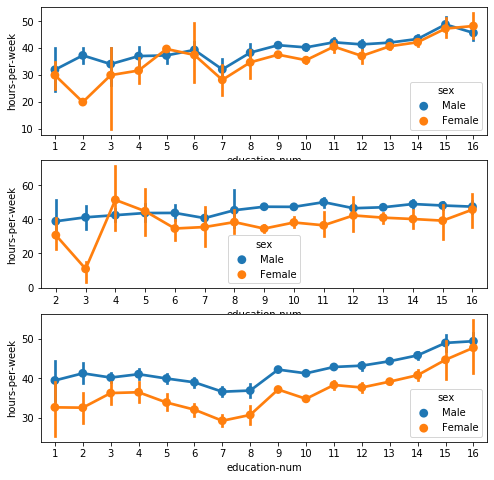

In [241]:
# Check for Government, Self_Employed and Private

fig, ax = plt.subplots(nrows=3, figsize = [8,8])

default_color = sns.color_palette()[0]
sns.pointplot(x = 'education-num', y = 'hours-per-week', hue = 'sex', data = income_clean[income_clean.workclass == 'Government'], ax = ax[0])
sns.pointplot(x = 'education-num', y = 'hours-per-week', hue = 'sex', data = income_clean[income_clean.workclass == 'Self_Employed'], ax = ax[1])
sns.pointplot(x = 'education-num', y = 'hours-per-week', hue = 'sex', data = income_clean[income_clean.workclass == 'Private'], ax = ax[2])

plt.show()

# It shows that female working hours-per-week are least discriminated in Government, followed by Self-Employed, then Private  

### race

#### Check the interaction between hours-per-week and race

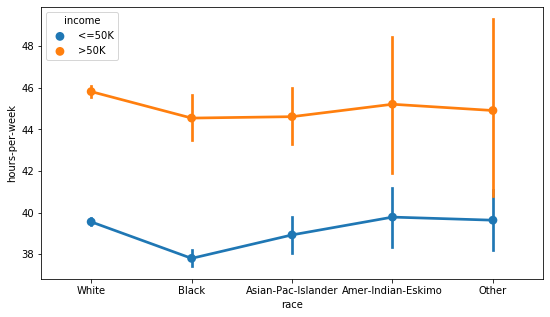

In [276]:
plt.figure(figsize = (9,5))
sns.pointplot(y="hours-per-week", x="race", hue = 'income', data=income_clean)
# It seems that there is no interaction between hours-per-week and race that would affect the income
# However, There are differences in different races' hours-per-week

In [323]:
white_hours = income_clean.loc[income_clean['race'] == 'White', 'hours-per-week']
black_hours = income_clean.loc[income_clean['race'] == 'Black', 'hours-per-week']
api_hours = income_clean.loc[income_clean['race'] == 'Asian-Pac-Islander', 'hours-per-week']
aie_hours = income_clean.loc[income_clean['race'] == 'Amer-Indian-Eskimo', 'hours-per-week']
other_hours = income_clean.loc[income_clean['race'] == 'Other', 'hours-per-week']

stat, pval = stats.f_oneway(white_hours, black_hours, api_hours, aie_hours, other_hours)
print('{0:0.3f}'.format(stat))
print('{0:0.3f}'.format(pval))
# Through one-way anova, we can see that the differences are statistically significant

29.149
0.000


##### Check the interaction between race, hours-per-week and workclass

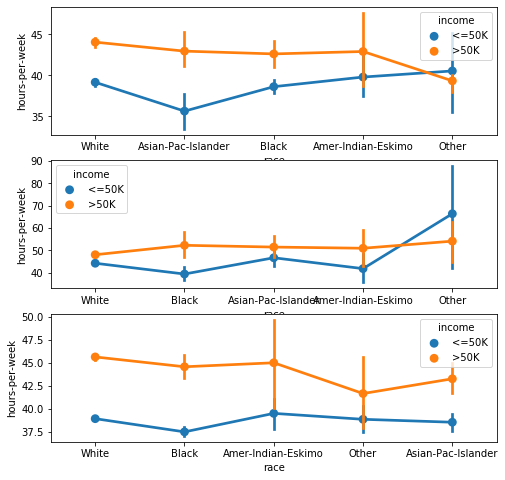

In [324]:
# Check for the situations in Government, Self_Employed and Private

fig, ax = plt.subplots(nrows=3, figsize = [8,8])

default_color = sns.color_palette()[0]
sns.pointplot(x = 'race', y = 'hours-per-week', hue = 'income', data = income_clean[income_clean.workclass == 'Government'], ax = ax[0])
sns.pointplot(x = 'race', y = 'hours-per-week', hue = 'income', data = income_clean[income_clean.workclass == 'Self_Employed'], ax = ax[1])
sns.pointplot(x = 'race', y = 'hours-per-week', hue = 'income', data = income_clean[income_clean.workclass == 'Private'], ax = ax[2])

plt.show()

# When we break the analysis into different workclasses
# We can see the interaction effect of races and hours0per-week in income
# For government and self-employed workclasses, the average trend is that: 
# The more hours you work, the higher probability you are in the >50K group,
# However, for minorities, the relationship is reversed.

## Conclusion

During this session, I tried to investigate the dataset of 1994 US adult income census, and draw insights to answer the major question of interest: what characteristics are most important in predicting an adult's income group (>50K or <=50K). 
Firstly, I cleaned the dataset by dropping empty values, merging minor levels in categorical columns etc. and got 12 columns of clean data with 30K+ observations.
Then, I conducted univariate, bivariate and multivariate visualizations to explore the distribution of each characteristics, and explain the relationship between different characteristics.
The insights I would like to highlight on the slide-deck are:
- __The distribution of income group__;
- __Relationship of numerical values and income group: overall positive relationships__
    - Boxplot: Age & income group
    - Boxplot: eductation-num & income group
    - Boxplot: hours-per-week & income group
- __Relationship of categorical values and income group__ 
    - Focus on gender and race (there are potential discriminations related to these two characteritics)
- __Multivariate plots: exploring the interaction effects related to either gender or race__
    - Interaction between gender and education: Not significantly. Generally the female has a lower average age compared to male, but the trends are constant as the older you are, the more you are likely to earn;
    - Interaction between gender and education: Female have higher education level in education both in <=50K group and >50K group, it might indicate that woman have to earn higher education degree to have more income. Pityfully, the difference in education level is not statistically significant;
    - Interaction between hours-per-week and gender: Significant. Generally, females are discriminated in hours-per-week, which doesn't disappear until Doctorate eduction level. When digging further, we could see that discrimnation are most severe in Private workclase, least severe in Government workclase. 
    - Interaction between hours-per-week and race: The difference for differnt races' hours-per-week is insignificant. However, if we dig deeper into different workclasses, we could see the interaction effect of races and hours0per-week in income: For government and self-employed workclasses, the average trend is that: The more hours you work, the higher probability you are in the >50K group, However, for minorities, the relationship is reversed.
   